In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = np.array(
    [
        160,
        165,
        167,
        164,
        160,
        166,
        160,
        161,
        150,
        152,
        173,
        160,
        155,
        164,
        168,
        162,
        161,
        168,
        163,
        156,
        155,
        169,
        151,
        170,
        164,
        155,
        152,
        163,
        160,
        155,
        157,
        156,
        158,
        158,
        161,
        154,
        161,
        156,
        172,
        153,
    ]
)

data = np.sort(data)

data

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [4]:
# Range
min_var = np.min(data)
max_var = np.max(data)

min_var, max_var

(150, 173)

In [5]:
np.unique(data, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1]))

<BarContainer object of 22 artists>

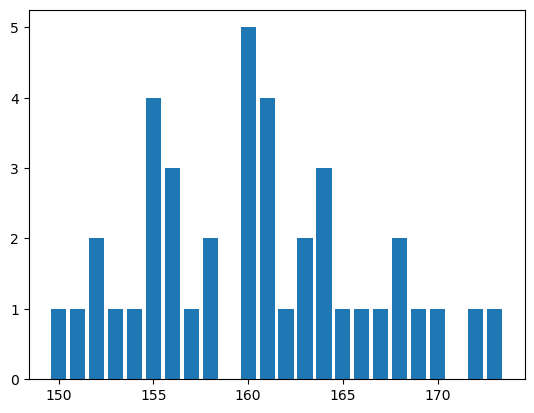

In [6]:
plt.bar(np.unique(data, return_counts=True)[0], np.unique(data, return_counts=True)[1])

In [7]:
# Class count
n = len(data)

i = 1 + 3.322 * np.log10(n)

round(i)

6

In [8]:
# Range amplitude
R = max_var - min_var

# Round up
h = round(R / i)

h

4

In [9]:
interval = np.arange(min_var, max_var + h, h)

interval

array([150, 154, 158, 162, 166, 170, 174])

In [10]:
# Class example
interval1, interval2, interval3, interval4, interval5, interval6 = 0, 0, 0, 0, 0, 0

for i in range(n):
    if data[i] >= interval[0] and data[i] < interval[1]:
        interval1 = interval1 + 1
    elif data[i] >= interval[1] and data[i] < interval[2]:
        interval2 = interval2 + 1
    elif data[i] >= interval[2] and data[i] < interval[3]:
        interval3 = interval3 + 1
    elif data[i] >= interval[3] and data[i] < interval[4]:
        interval4 = interval4 + 1
    elif data[i] >= interval[4] and data[i] < interval[5]:
        interval5 = interval5 + 1
    elif data[i] >= interval[5] and data[i] < interval[6]:
        interval6 = interval6 + 1

interval1, interval2, interval3, interval4, interval5, interval6

(5, 9, 11, 7, 5, 3)

In [11]:
# Frequency
interval_counts = [0] * (len(interval) - 1)

for value in data:
    for j in range(len(interval) - 1):
        if interval[j] <= value < interval[j + 1]:
            interval_counts[j] += 1
            break

interval_counts

[5, 9, 11, 7, 5, 3]

In [12]:
class_list = []

for i in range(len(interval) - 1):
    class_list.append(f"{interval[i]} - {interval[i+1]}")

class_list

['150 - 154', '154 - 158', '158 - 162', '162 - 166', '166 - 170', '170 - 174']

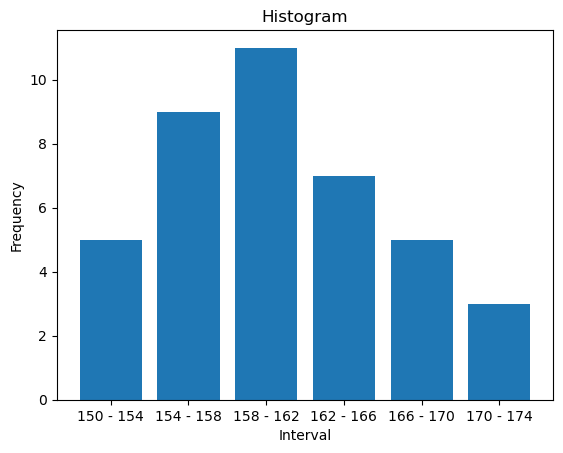

In [13]:
plt.bar(class_list, interval_counts)
plt.title("Histogram")
plt.xlabel("Interval")
plt.ylabel("Frequency")
plt.show()

### Easy way

In [14]:
frequency, classes = np.histogram(data, bins="sturges")

frequency, classes

(array([ 5,  8,  3, 12,  5,  4,  3]),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

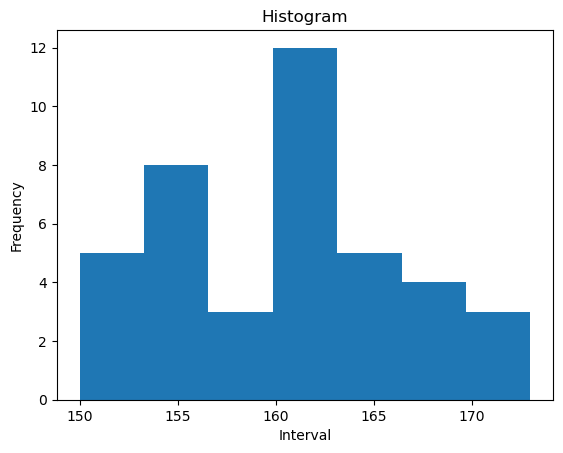

In [15]:
plt.hist(data, bins=classes.tolist())
plt.title("Histogram")
plt.xlabel("Interval")
plt.ylabel("Frequency")
plt.show()

## Using Pandas and Seaborn

In [16]:
dataframe = pd.DataFrame(data, columns=["Data"])

dataframe

,Data
0,150
1,151
2,152
3,152
4,153
5,154
6,155
7,155
8,155
9,155


<Axes: ylabel='Frequency'>

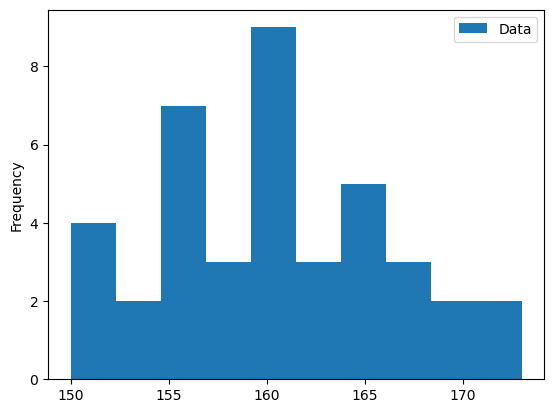

In [17]:
dataframe.plot.hist()

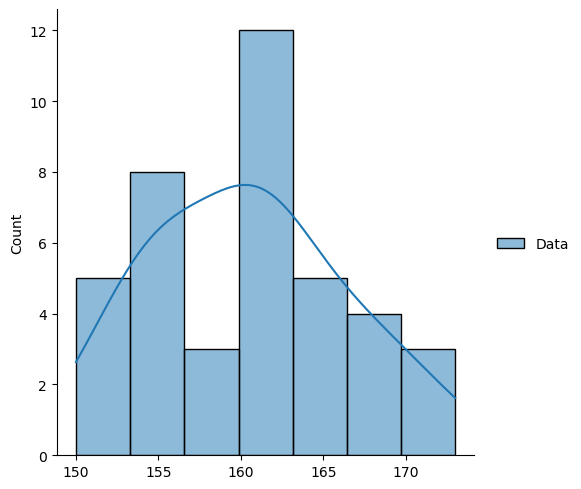

In [18]:
sns.displot(dataframe, kde=True)

## Exercise

In [19]:
dataframe = pd.read_csv("data/census.csv")

dataframe.head(10)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<Axes: ylabel='Frequency'>

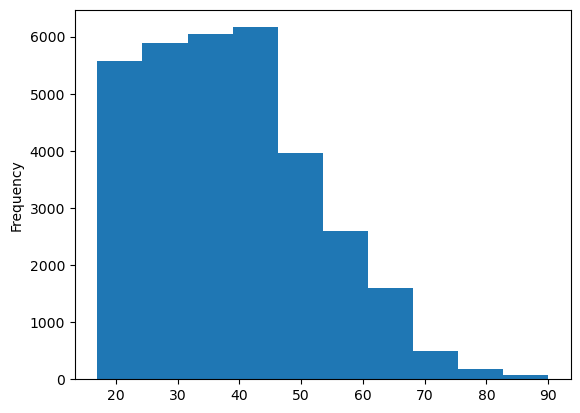

In [20]:
dataframe["age"].plot.hist()

(array([3130., 4066., 3376., 4353., 3399., 3876., 2722., 2716., 1924.,
        1225.,  917.,  389.,  273.,   96.,   51.,   48.]),
 array([17.    , 21.5625, 26.125 , 30.6875, 35.25  , 39.8125, 44.375 ,
        48.9375, 53.5   , 58.0625, 62.625 , 67.1875, 71.75  , 76.3125,
        80.875 , 85.4375, 90.    ]),
 <BarContainer object of 16 artists>)

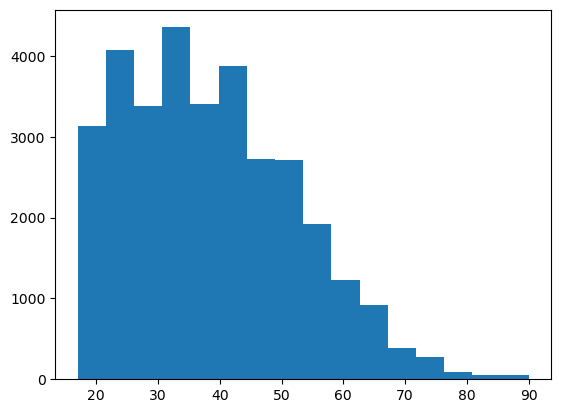

In [21]:
age_frequency, age_classes = np.histogram(dataframe["age"], bins="sturges")

plt.hist(dataframe["age"], bins=age_classes.tolist())

In [ ]:
dataframe["age"].min(), dataframe["age"].max()

(17, 90)

In [ ]:
dataframe["age"] = pd.cut(
    dataframe["age"],
    bins=[0, 17, 25, 40, 60, 90],
    labels=["0-17", "18-25", "26-40", "41-60", "61-90"],
)

dataframe.head(10)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,26-40,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,41-60,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,26-40,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,41-60,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,26-40,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,26-40,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,41-60,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,41-60,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,26-40,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,41-60,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<Axes: >

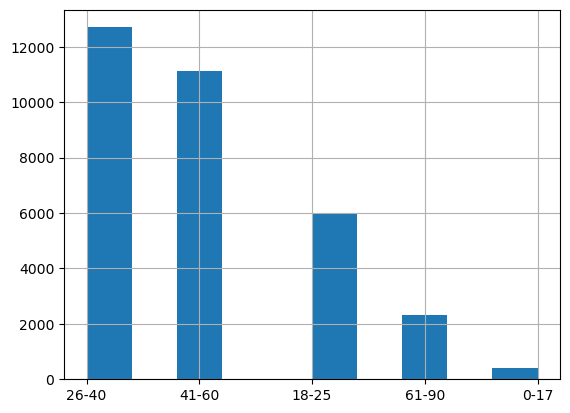

In [24]:
dataframe["age"].hist()

In [28]:
dataset_apriori = dataframe[
    [
        "age",
        "workclass",
        "education",
        "marital-status",
        "relationship",
        "occupation",
        "sex",
        "native-country",
        "income",
    ]
]

dataset_apriori.head()

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,26-40,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,41-60,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,26-40,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,41-60,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,26-40,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [29]:
dataset_apriori = dataset_apriori.sample(1000)

dataset_apriori.shape

(1000, 9)

In [ ]:
transitions = []

for i in range(0, dataset_apriori.shape[0]):
    transitions.append(
        [str(dataset_apriori.values[i, j]) for j in range(0, dataset_apriori.shape[1])]
    )

transitions[:3]

[['26-40',
  ' Private',
  ' HS-grad',
  ' Married-civ-spouse',
  ' Husband',
  ' Tech-support',
  ' Male',
  ' United-States',
  ' >50K'],
 ['26-40',
  ' Private',
  ' HS-grad',
  ' Married-civ-spouse',
  ' Husband',
  ' Other-service',
  ' Male',
  ' United-States',
  ' <=50K'],
 ['41-60',
  ' Private',
  ' Some-college',
  ' Divorced',
  ' Unmarried',
  ' Adm-clerical',
  ' Female',
  ' United-States',
  ' <=50K']]

# Installing Apyori

In [33]:
import apyori

In [39]:
rules = apyori.apriori(transitions, min_support=0.3, min_confidence=0.2)

results = list(rules)

results[10:20]

[RelationRecord(items=frozenset({'41-60'}), support=0.344, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'41-60'}), confidence=0.344, lift=1.0)]),
 RelationRecord(items=frozenset({' <=50K', ' Female'}), support=0.309, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K', ' Female'}), confidence=0.309, lift=1.0), OrderedStatistic(items_base=frozenset({' <=50K'}), items_add=frozenset({' Female'}), confidence=0.41035856573705176, lift=1.2104972440620996), OrderedStatistic(items_base=frozenset({' Female'}), items_add=frozenset({' <=50K'}), confidence=0.911504424778761, lift=1.2104972440620996)]),
 RelationRecord(items=frozenset({' <=50K', ' Male'}), support=0.444, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K', ' Male'}), confidence=0.444, lift=1.0), OrderedStatistic(items_base=frozenset({' <=50K'}), items_add=frozenset({' Male'}), confidence=0.5896414342629482, lift=0.8920